In [7]:
import pandas as pd
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [8]:
data = pd.read_csv('BOD_biclass_139rdkit.csv')

In [9]:
data.head()

,SMILES,bod_class,exactmw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeteroatoms,NumAmideBonds,...,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42
0,CCC1(C(=O)NC(=O)NC1=O)c2ccccc2,0,232.084792,5.0,2.0,2.0,2.0,3.0,5.0,4.0,...,0,0,0,2,0,0,0,0,0,0
1,CC(O)C(O)=O,1,90.031694,3.0,2.0,1.0,2.0,2.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,Clc1ccc(cc1)C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl,0,351.914689,0.0,0.0,2.0,0.0,0.0,5.0,0.0,...,0,0,0,2,0,0,0,0,0,0
3,OC(=O)c1c(Cl)ccc(Cl)c1Cl,1,223.919862,2.0,1.0,1.0,1.0,1.0,5.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,OCC(O)C(O)C(O)C(O)CO,1,182.079038,6.0,6.0,5.0,6.0,6.0,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data.shape

(1063, 141)

In [11]:
data_139 = data.iloc[:,2:141]

In [12]:
data_139.head()

,exactmw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeteroatoms,NumAmideBonds,FractionCSP3,NumRings,...,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42
0,232.084792,5.0,2.0,2.0,2.0,3.0,5.0,4.0,0.250000,2.0,...,0,0,0,2,0,0,0,0,0,0
1,90.031694,3.0,2.0,1.0,2.0,2.0,3.0,0.0,0.666667,0.0,...,0,0,0,0,0,0,0,0,0,0
2,351.914689,0.0,0.0,2.0,0.0,0.0,5.0,0.0,0.142857,2.0,...,0,0,0,2,0,0,0,0,0,0
3,223.919862,2.0,1.0,1.0,1.0,1.0,5.0,0.0,0.000000,1.0,...,0,0,0,1,0,0,0,0,0,0
4,182.079038,6.0,6.0,5.0,6.0,6.0,6.0,0.0,1.000000,0.0,...,0,0,0,0,0,0,0,0,0,0


#try to reduce the dimension to 20 by 1 layer of encoder and 1 layer of decoder

In [13]:
encoding_dim = 20
input_data = Input(shape = (139,))
encoded = Dense(encoding_dim,activation='relu')(input_data)
decoded = Dense(139,activation = 'sigmoid')(encoded)
autoencoder = Model(input_data,decoded)

Instructions for updating:
Colocations handled automatically by placer.


configure the model

In [14]:
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')

In [21]:
data_train = data_139.as_matrix()


C:\Users\yychen\Miniconda3\envs\deepchembed\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [22]:
data_train.shape

(1063, 139)

In [23]:
history = autoencoder.fit(data_train,data_train,epochs= 50,batch_size=256,shuffle=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
1063/1063 [==============================] - 1s 524us/step - loss: 14.2904
Epoch 2/50
1063/1063 [==============================] - 0s 40us/step - loss: -7.4635
Epoch 3/50
1063/1063 [==============================] - 0s 33us/step - loss: -47.1905
Epoch 4/50
1063/1063 [==============================] - 0s 29us/step - loss: -74.9780
Epoch 5/50
1063/1063 [==============================] - 0s 39us/step - loss: -86.0387
Epoch 6/50
1063/1063 [==============================] - 0s 45us/step - loss: -91.6283
Epoch 7/50
1063/1063 [==============================] - 0s 49us/step - loss: -92.7168
Epoch 8/50
1063/1063 [==============================] - 0s 42us/step - loss: -95.5336
Epoch 9/50
1063/1063 [==============================] - 0s 37us/step - loss: -95.6983
Epoch 10/50
1063/1063 [==============================] - 0s 42us/step - loss: -95.7819
Epoch 11/50
1063/1063 [==============================] - 0s 53us/step - loss: -95.8315
Epoch

In [24]:
print(history.history.keys())

dict_keys(['loss'])


In [25]:
import matplotlib.pyplot as plt

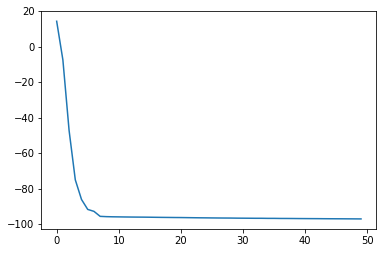

In [26]:
plt.plot(history.history['loss'])